# pandas



### Missing Values: isnull(), fillna()

### Filtering: df[condition]

### Grouping: groupby() + mean() / size()

### Counting: value_counts()

In [2]:
import pandas as pd

# Load CSV dataset
df = pd.read_csv("Crop_recommendation.csv")  
#  Show first 5 rows
print("=== Dataset Sample ===")
print(df.head())
#ph mean Slight acidic soil (rice ke liye perfect)
#humidity mean Zyada nami = rice ke liye best
#label = rice Matlab:In sab conditions me RICE sab se best crop hai


=== Dataset Sample ===
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


## Step 2: Missing Values Check & Handle
### Agar kisi numeric column me value missing ho, to us jagah usi column ka median daal do

In [3]:
# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Fill missing numeric values with median
numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
#Mode kya hota hai?Jo value sab se zyada repeat hoti hai


# Fill missing categorical values with mode
df['label'] = df['label'].fillna(df['label'].mode()[0])



=== Missing Values ===
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


## Step 3: Filtering / Grouping Example
### Ye code un crops ko nikalta hai jo zyada rainfall (barish) me grow hote hain

## a) Filter crops with rainfall > 250

In [4]:
high_rain_crops = df[df['rainfall'] > 250]#df['rainfall'] > 250➜ check karta hai kaun si rows me rainfall 250 mm se zyada hai
print("\n=== Crops with Rainfall > 250 ===")
print(high_rain_crops[['label','rainfall']].head())



=== Crops with Rainfall > 250 ===
   label    rainfall
2   rice  263.964248
4   rice  262.717340
5   rice  251.055000
6   rice  271.324860
10  rice  264.614870


## b) Group by crop and get average N, P, K
### Kaunsa crop zyada Nitrogen chahta hai Kaunsa crop Phosphorus / Potassium zyada use karta hai

In [6]:
crop_avg_npk = df.groupby('label')[['N','P','K']].mean().reset_index()
print("\n=== Average N,P,K per Crop ===")
print(crop_avg_npk)



=== Average N,P,K per Crop ===
          label       N       P       K
0         apple   20.80  134.22  199.89
1        banana  100.23   82.01   50.05
2     blackgram   40.02   67.47   19.24
3      chickpea   40.09   67.79   79.92
4       coconut   21.98   16.93   30.59
5        coffee  101.20   28.74   29.94
6        cotton  117.77   46.24   19.56
7        grapes   23.18  132.53  200.11
8          jute   78.40   46.86   39.99
9   kidneybeans   20.75   67.54   20.05
10       lentil   18.77   68.36   19.41
11        maize   77.76   48.44   19.79
12        mango   20.07   27.18   29.92
13    mothbeans   21.44   48.01   20.23
14     mungbean   20.99   47.28   19.87
15    muskmelon  100.32   17.72   50.08
16       orange   19.58   16.55   10.01
17       papaya   49.88   59.05   50.04
18   pigeonpeas   20.73   67.73   20.29
19  pomegranate   18.87   18.75   40.21
20         rice   79.89   47.58   39.87
21   watermelon   99.42   17.00   50.22


## c) Count of crops
### Dataset me har crop kitni dafa aaya hai (frequency / count) nikalna

In [8]:
crop_counts = df['label'].value_counts()
print("\n=== Crop Counts ===")
print(crop_counts)



=== Crop Counts ===
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


# numpy

In [10]:
import numpy as np

In [11]:
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


## Step 2: Assign Season using NumPy

In [12]:
# Vectorized season assignment
df['season'] = np.where(df['rainfall'] > 200, "Monsoon",
                        np.where(df['temperature'] > 25, "Summer", "Winter"))
#Temperature > 25°C → Summer  Warna → Winter


print("=== Season Column Added ===")
print(df[['temperature','rainfall','season']].head())


=== Season Column Added ===
   temperature    rainfall   season
0    20.879744  202.935536  Monsoon
1    21.770462  226.655537  Monsoon
2    23.004459  263.964248  Monsoon
3    26.491096  242.864034  Monsoon
4    20.130175  262.717340  Monsoon


## Step 3: Assign Area using NumPy

In [14]:
df['area'] = np.where((df['rainfall'] > 250) & (df['humidity'] > 80), "Coastal",
                      np.where(df['rainfall'] < 150, "Dry area",
                               np.where((df['rainfall'] >= 150) & (df['rainfall'] <= 250) & (df['humidity'] < 80), "Plains", "Hilly")))

print("=== Area Column Added ===")
print(df[['rainfall','humidity','area']].head())


=== Area Column Added ===
     rainfall   humidity     area
0  202.935536  82.002744    Hilly
1  226.655537  80.319644    Hilly
2  263.964248  82.320763  Coastal
3  242.864034  80.158363    Hilly
4  262.717340  81.604873  Coastal


## Step 4: NumPy Stats per Crop

In [16]:
crops = df['label'].unique()
print("=== NumPy Statistics per Crop ===\n")
for crop in crops:#for crop in crops:

    crop_data = df[df['label'] == crop]
    temp = crop_data['temperature'].values
    rain = crop_data['rainfall'].values
    n = len(temp)
    print(f"{crop} ({n} records):")
    print(f"  Avg Temp = {np.mean(temp):.2f}")
    print(f"  Median Temp = {np.median(temp):.2f}")
    print(f"  Std Temp = {np.std(temp):.2f}")
    print(f"  Avg Rain = {np.mean(rain):.2f}")
    print(f"  Median Rain = {np.median(rain):.2f}")
    print(f"  Std Rain = {np.std(rain):.2f}\n")


=== NumPy Statistics per Crop ===

rice (100 records):
  Avg Temp = 23.69
  Median Temp = 23.73
  Std Temp = 2.02
  Avg Rain = 236.18
  Median Rain = 233.12
  Std Rain = 34.12

maize (100 records):
  Avg Temp = 22.39
  Median Temp = 22.84
  Std Temp = 2.67
  Avg Rain = 84.77
  Median Rain = 83.47
  Std Rain = 15.47

chickpea (100 records):
  Avg Temp = 18.87
  Median Temp = 18.88
  Std Temp = 1.16
  Avg Rain = 80.06
  Median Rain = 79.69
  Std Rain = 7.90

kidneybeans (100 records):
  Avg Temp = 20.12
  Median Temp = 19.92
  Std Temp = 2.59
  Avg Rain = 105.92
  Median Rain = 107.40
  Std Rain = 25.98

pigeonpeas (100 records):
  Avg Temp = 27.74
  Median Temp = 28.93
  Std Temp = 5.69
  Avg Rain = 149.46
  Median Rain = 154.31
  Std Rain = 32.82

mothbeans (100 records):
  Avg Temp = 28.19
  Median Temp = 28.37
  Std Temp = 2.20
  Avg Rain = 51.20
  Median Rain = 51.18
  Std Rain = 13.68

mungbean (100 records):
  Avg Temp = 28.53
  Median Temp = 28.44
  Std Temp = 0.84
  Avg Rain = 4

## Step 5: Best Crop per Area using NumPy
### Har area ke liye sab se zyada suitable (best) crop nikalna

In [18]:
areas = df['area'].unique()
print("=== Best Crop per Area ===\n")
for area in areas:
    area_data = df[df['area'] == area]#Dataset me se rows select karo jahan area match ho Ab area_data me sirf us area ka data hai
    crops_count = np.unique(area_data['label'], return_counts=True)#np.unique → unique crops aur unka count return karta hai return_counts=True → frequency bhi return hog
    best_crop_index = np.argmax(crops_count[1])#np.argmax → maximum count ka index return karta hai
    print(f"{area}: Best Crop = {crops_count[0][best_crop_index]} (Count = {crops_count[1][best_crop_index]})")#crops_count[0] → unique crops list [best_crop_index] → index of most frequent crop
#{crops_count[1][best_crop_index]}  crops_count[1] → frequency (count) of each crop  [best_crop_index] → index of max count

=== Best Crop per Area ===

Hilly: Best Crop = coconut (Count = 73)
Coastal: Best Crop = rice (Count = 38)
Dry area: Best Crop = apple (Count = 100)
Plains: Best Crop = coffee (Count = 56)


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label   season  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice  Monsoon   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice  Monsoon   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice  Monsoon   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice  Monsoon   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice  Monsoon   

      area  
0    Hilly  
1    Hilly  
2  Coastal  
3    Hilly  
4  Coastal  


## MATPLOTLIB VISUALIZATION
## Bar Chart – Best Crop per Area

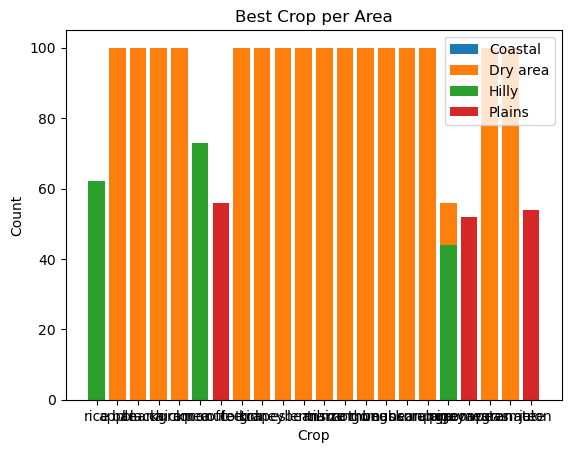

In [21]:
area_crop = df.groupby(['area','label']).size().reset_index(name='count')

plt.figure()
for area in area_crop['area'].unique():
    data = area_crop[area_crop['area'] == area]
    plt.bar(data['label'], data['count'], label=area)

plt.xlabel("Crop")
plt.ylabel("Count")
plt.title("Best Crop per Area")
plt.legend()
plt.show()


# Line Chart – Rainfall vs Temperature

## Weather trend dekhne ke liye

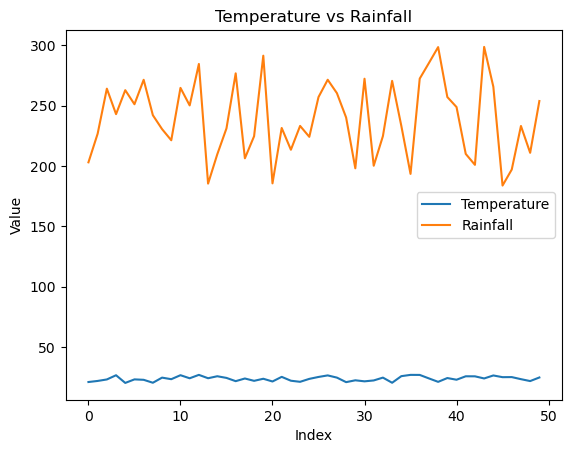

In [22]:
plt.figure()
plt.plot(df['temperature'][:50], label="Temperature")
plt.plot(df['rainfall'][:50], label="Rainfall")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Temperature vs Rainfall")
plt.legend()
plt.show()


# Scatter Plot – Rainfall vs Crop
## Kaunsa crop zyada rainfall me grow karta hai

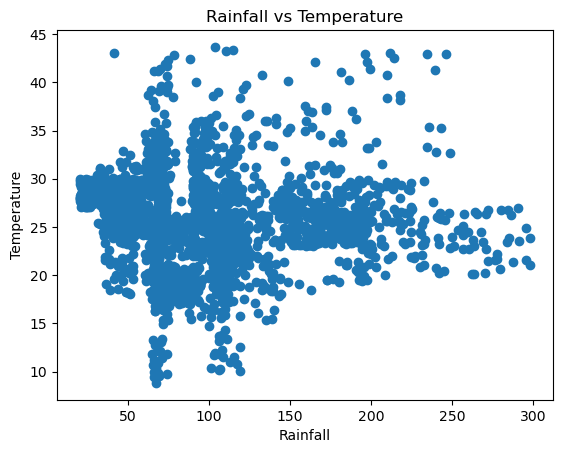

In [24]:
plt.figure()
plt.scatter(df['rainfall'], df['temperature'])
plt.xlabel("Rainfall")
plt.ylabel("Temperature")
plt.title("Rainfall vs Temperature")
plt.show()


# SEABORN VISUALIZATION

# Countplot – Crop Distribution

##  Sab se zyada kaunsa crop dataset me hai

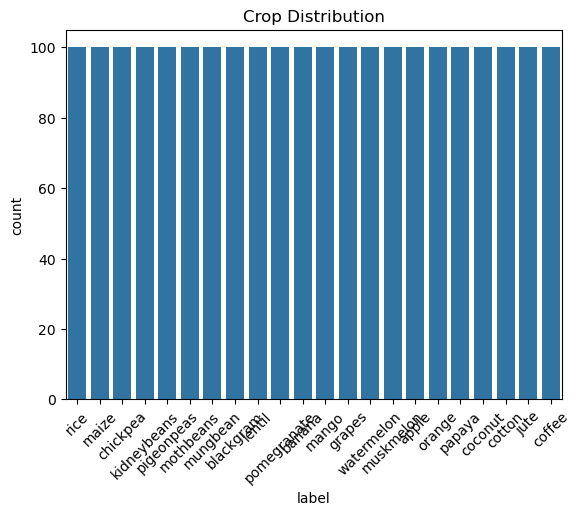

In [26]:
plt.figure()
sns.countplot(x='label', data=df)
plt.title("Crop Distribution")
plt.xticks(rotation=45)
plt.show()


# Barplot – Average Rainfall per Crop

## Kaunsa crop zyada rainfall chahta hai

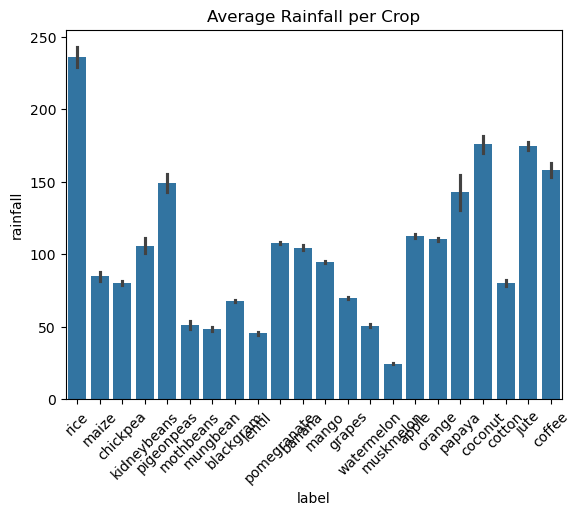

In [27]:
plt.figure()
sns.barplot(x='label', y='rainfall', data=df)
plt.title("Average Rainfall per Crop")
plt.xticks(rotation=45)
plt.show()


# Heatmap – Correlation (Most Important)

## Soil + weather ka relation

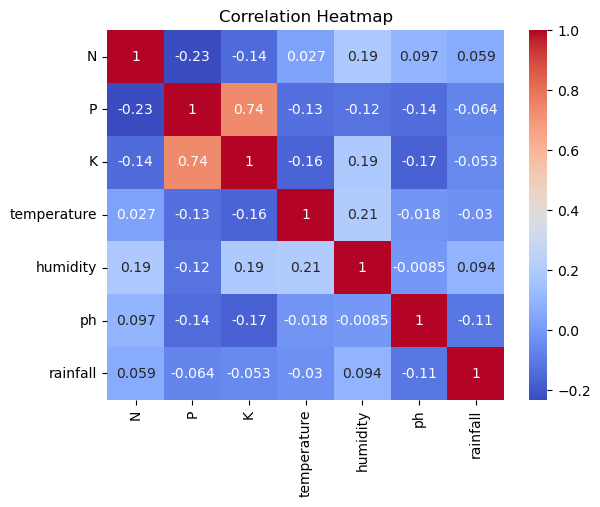

In [29]:
plt.figure()
sns.heatmap(df[['N','P','K','temperature','humidity','ph','rainfall']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
